In [1]:
import pandas as pd
from glob import glob
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, describe, linregress

In [2]:
species_dict = {'1-SAT_S1' : 'Salmonella enterica', 
                '10-KPN_S9' : 'Klebsiella pneumoniae',
                '2-SAT_S2' : 'Salmonella enterica',
                '4-NTS_S4' : 'Salmonella enterica',
                '5-NTS_S5' : 'Salmonella enterica',
                '7-GC_S7' : 'Neisseria gonorrhoeae'}

In [3]:
pattern = re.compile(r'kraken_uniq\/data\/(.+)_mixed_with_(\d+)%_(.+)\.krakenuniq.report.tsv')

combined_df = pd.DataFrame()
for file in glob("../../kraken_uniq/data/*.report.tsv"):
    # skip non-mixed files
    if not 'mixed_with' in file:
        continue

    
    result = pattern.search(file)
    
    # get species and mixture percent from the filename
    main_species_label = result.group(1)
    percent_contam = int(result.group(2))
    contam_species_label = result.group(3)
    

    # read file into a dataframe
    df = pd.read_csv(file, sep = '\t', header = 2)
    # rename columns
    df = df.rename(columns = {'taxName': 'observed_species', '%' : 'observed_percent_contam'})
    # strip spaces
    df['observed_species'] = df['observed_species'].str.strip()
    # filename without suffix
    df['file'] = os.path.basename(file).replace('_R1.fastq_stats_output_filt.tsv', '')
    # determine expected values
    df['expected_main_species'] = species_dict[main_species_label]
    df['expected_contam_species'] = species_dict[contam_species_label]
    df['expected_percent_contam'] = percent_contam
    # only include good hits
    df = df.loc[(df['rank'] == 'species') & (df['observed_percent_contam'] > 0.1)]
    # remove matches to expected species
    df = df.loc[df['expected_main_species'] != df['observed_species']]
    # only retain some columns
    df = df.filter(['file', 'expected_main_species', 'expected_contam_species', 'expected_percent_contam', 'observed_species', 'observed_percent_contam'])
    # append to the combined dataframe
    combined_df = combined_df.append(df,  ignore_index=True)

combined_df

file  expected_main_species  \
0    7-GC_S7_mixed_with_25%_10-KPN_S9.krakenuniq.re...  Neisseria gonorrhoeae   
1    7-GC_S7_mixed_with_25%_10-KPN_S9.krakenuniq.re...  Neisseria gonorrhoeae   
2    7-GC_S7_mixed_with_25%_4-NTS_S4.krakenuniq.rep...  Neisseria gonorrhoeae   
3    7-GC_S7_mixed_with_25%_4-NTS_S4.krakenuniq.rep...  Neisseria gonorrhoeae   
4    7-GC_S7_mixed_with_5%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
5    7-GC_S7_mixed_with_5%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
6    7-GC_S7_mixed_with_5%_10-KPN_S9.krakenuniq.rep...  Neisseria gonorrhoeae   
7    7-GC_S7_mixed_with_5%_10-KPN_S9.krakenuniq.rep...  Neisseria gonorrhoeae   
8    7-GC_S7_mixed_with_5%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
9    7-GC_S7_mixed_with_5%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
10   7-GC_S7_mixed_with_25%_1-SAT_S1.krakenuniq.rep...  Neisseria gonorrhoeae   
11   7-GC_S7_mixed_with_10%_4-NTS_S4.krakenuniq.rep...  Neisseria gonorrhoeae   
12   7-GC_S7_mixed_with_10%_10-KPN_S9.krakenuniq.re...  Neisseria gonorrhoeae   
13   7-GC_S7_mixed_with_10%_1-SAT_S1.krakenuniq.rep...  Neisseria gonorrhoeae   
14   7-GC_S7_mixed_with_1%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
15   7-GC_S7_mixed_with_1%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
16   7-GC_S7_mixed_with_1%_10-KPN_S9.krakenuniq.rep...  Neisseria gonorrhoeae   
17   7-GC_S7_mixed_with_1%_10-KPN_S9.krakenuniq.rep...  Neisseria gonorrhoeae   
18   7-GC_S7_mixed_with_1%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
19   7-GC_S7_mixed_with_1%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
20   4-NTS_S4_mixed_with_5%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
21   4-NTS_S4_mixed_with_5%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
22   4-NTS_S4_mixed_with_5%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
23   4-NTS_S4_mixed_with_5%_5-NTS_S5.krakenuniq.rep...    Salmonella enterica   
24   4-NTS_S4_mixed_with_5%_5-NTS_S5.krakenuniq.rep...    Salmonella enterica   
25   4-NTS_S4_mixed_with_25%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
26   4-NTS_S4_mixed_with_25%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
27   4-NTS_S4_mixed_with_25%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
28   4-NTS_S4_mixed_with_5%_10-KPN_S9.krakenuniq.re...    Salmonella enterica   
29   4-NTS_S4_mixed_with_5%_10-KPN_S9.krakenuniq.re...    Salmonella enterica   
..                                                 ...                    ...   
91   10-KPN_S9_mixed_with_10%_1-SAT_S1.krakenuniq.r...  Klebsiella pneumoniae   
92   10-KPN_S9_mixed_with_10%_1-SAT_S1.krakenuniq.r...  Klebsiella pneumoniae   
93   10-KPN_S9_mixed_with_10%_1-SAT_S1.krakenuniq.r...  Klebsiella pneumoniae   
94   10-KPN_S9_mixed_with_10%_1-SAT_S1.krakenuniq.r...  Klebsiella pneumoniae   
95   10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...  Klebsiella pneumoniae   
96   10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...  Klebsiella pneumoniae   
97   10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...  Klebsiella pneumoniae   
98   10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...  Klebsiella pneumoniae   
99   10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...  Klebsiella pneumoniae   
100  10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...  Klebsiella pneumoniae   
101  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...  Klebsiella pneumoniae   
102  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...  Klebsiella pneumoniae   
103  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...  Klebsiella pneumoniae   
104  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...  Klebsiella pneumoniae   
105  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...  Klebsiella pneumoniae   
106  10-KPN_S9_mixed_with_1%_1-SAT_S1.krakenuniq.re...  Klebsiella pneumoniae   
107  10-KPN_S9_mixed_with_1%_1-SAT_S1.krakenuniq.re...  Klebsiella pneumoniae   
108  10-KPN_S9_mixed_with_1%_1-SAT_S1.krakenuniq.re...  Klebsiella pneumoniae   


In [8]:
# extract matching data where observed contam matches expected
# first find rows where observed matches expected
matching = combined_df.loc[combined_df['expected_contam_species'] == combined_df['observed_species']].copy()
# exclude Salmonella results
matching = matching.loc[matching['expected_main_species'] != matching['expected_contam_species']]
# add column for deviation
matching['deviation'] = matching['expected_percent_contam'] - matching['observed_percent_contam']
matching['deviation_percent'] = (matching['expected_percent_contam'] - matching['observed_percent_contam'])/matching['expected_percent_contam']*100

matching

file  expected_main_species  \
0    7-GC_S7_mixed_with_25%_10-KPN_S9.krakenuniq.re...  Neisseria gonorrhoeae   
2    7-GC_S7_mixed_with_25%_4-NTS_S4.krakenuniq.rep...  Neisseria gonorrhoeae   
5    7-GC_S7_mixed_with_5%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
7    7-GC_S7_mixed_with_5%_10-KPN_S9.krakenuniq.rep...  Neisseria gonorrhoeae   
9    7-GC_S7_mixed_with_5%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
10   7-GC_S7_mixed_with_25%_1-SAT_S1.krakenuniq.rep...  Neisseria gonorrhoeae   
11   7-GC_S7_mixed_with_10%_4-NTS_S4.krakenuniq.rep...  Neisseria gonorrhoeae   
12   7-GC_S7_mixed_with_10%_10-KPN_S9.krakenuniq.re...  Neisseria gonorrhoeae   
13   7-GC_S7_mixed_with_10%_1-SAT_S1.krakenuniq.rep...  Neisseria gonorrhoeae   
15   7-GC_S7_mixed_with_1%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
17   7-GC_S7_mixed_with_1%_10-KPN_S9.krakenuniq.rep...  Neisseria gonorrhoeae   
19   7-GC_S7_mixed_with_1%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
22   4-NTS_S4_mixed_with_5%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
27   4-NTS_S4_mixed_with_25%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
28   4-NTS_S4_mixed_with_5%_10-KPN_S9.krakenuniq.re...    Salmonella enterica   
34   4-NTS_S4_mixed_with_25%_10-KPN_S9.krakenuniq.r...    Salmonella enterica   
42   4-NTS_S4_mixed_with_10%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
43   4-NTS_S4_mixed_with_10%_10-KPN_S9.krakenuniq.r...    Salmonella enterica   
49   4-NTS_S4_mixed_with_1%_10-KPN_S9.krakenuniq.re...    Salmonella enterica   
55   4-NTS_S4_mixed_with_1%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
60   10-KPN_S9_mixed_with_5%_7-GC_S7.krakenuniq.rep...  Klebsiella pneumoniae   
63   10-KPN_S9_mixed_with_5%_4-NTS_S4.krakenuniq.re...  Klebsiella pneumoniae   
68   10-KPN_S9_mixed_with_5%_1-SAT_S1.krakenuniq.re...  Klebsiella pneumoniae   
74   10-KPN_S9_mixed_with_25%_7-GC_S7.krakenuniq.re...  Klebsiella pneumoniae   
75   10-KPN_S9_mixed_with_25%_4-NTS_S4.krakenuniq.r...  Klebsiella pneumoniae   
81   10-KPN_S9_mixed_with_10%_7-GC_S7.krakenuniq.re...  Klebsiella pneumoniae   
83   10-KPN_S9_mixed_with_25%_1-SAT_S1.krakenuniq.r...  Klebsiella pneumoniae   
86   10-KPN_S9_mixed_with_10%_4-NTS_S4.krakenuniq.r...  Klebsiella pneumoniae   
91   10-KPN_S9_mixed_with_10%_1-SAT_S1.krakenuniq.r...  Klebsiella pneumoniae   
99   10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...  Klebsiella pneumoniae   
102  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...  Klebsiella pneumoniae   
107  10-KPN_S9_mixed_with_1%_1-SAT_S1.krakenuniq.re...  Klebsiella pneumoniae   
111  1-SAT_S1_mixed_with_5%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
112  1-SAT_S1_mixed_with_5%_10-KPN_S9.krakenuniq.re...    Salmonella enterica   
113  1-SAT_S1_mixed_with_25%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
115  1-SAT_S1_mixed_with_25%_10-KPN_S9.krakenuniq.r...    Salmonella enterica   
117  1-SAT_S1_mixed_with_10%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
118  1-SAT_S1_mixed_with_10%_10-KPN_S9.krakenuniq.r...    Salmonella enterica   
119  1-SAT_S1_mixed_with_1%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
120  1-SAT_S1_mixed_with_1%_10-KPN_S9.krakenuniq.re...    Salmonella enterica   

    expected_contam_species  expected_percent_contam       observed_species  \
0     Klebsiella pneumoniae                       25  Klebsiella pneumoniae   
2       Salmonella enterica                       25    Salmonella enterica   
5       Salmonella enterica                        5    Salmonella enterica   
7     Klebsiella pneumoniae                        5  Klebsiella pneumoniae   
9       Salmonella enterica                        5    Salmonella enterica   
10      Salmonella enterica                       25    Salmonella enterica   
11      Salmonella enterica                       10    Salmonella enterica   
12    Klebsiella pneumoniae                       10  Klebsiella pneumoniae   
13      Salmonell

/Users/au3/.pyenv/versions/3.7.0/envs/jupyter/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.990636888516253

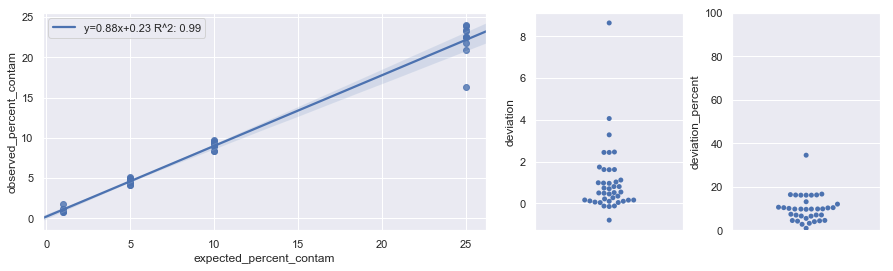

In [9]:
# plot matching data

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(matching['expected_percent_contam'], matching['observed_percent_contam'])

sns.set()
f, axes = plt.subplots(1,3, figsize = [15,4], gridspec_kw  = { 'width_ratios' : [3,1,1]})
ax = sns.regplot(x="expected_percent_contam", y="observed_percent_contam", data=matching, ax=axes[0], line_kws={'label':"y={0:.2f}x+{1:.2f} R^2: {2:.2f}".format(slope,intercept, r_value)})
ax.legend()
sns.swarmplot(y="deviation", data=matching, ax=axes[1])
ax = sns.swarmplot(y="deviation_percent", data=matching, ax=axes[2])
ax.set(ylim=(0, 100))
r_value

In [10]:
ttest_rel(matching['expected_percent_contam'], matching['observed_percent_contam'])

Ttest_relResult(statistic=4.106626109109192, pvalue=0.000198830827894253)

In [11]:
describe(matching['deviation'])

DescribeResult(nobs=40, minmax=(-0.7969999999999999, 8.629999999999999), mean=1.0293424999999998, variance=2.5130982768653847, skewness=3.049686796779592, kurtosis=11.510080388472852)